In [ ]:
import pandas as pd

# Cargar los datos
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Inspección preliminar
calendar.head()

# EDA Calendar

In [ ]:
calendar.shape

In [ ]:
calendar.info()

Una vez que has cargado y visualizado los datos preliminares, el siguiente paso es la limpieza y validación preliminar.

In [2]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    105
maximum_nights    105
dtype: int64

In [3]:
# Eliminando filas con valores faltantes en las columnas 'minimum_nights' y 'maximum_nights'
calendar_cleaned = calendar.dropna(subset=['minimum_nights', 'maximum_nights'])

# Verificar si se eliminaron correctamente
print(calendar_cleaned.isnull().sum())

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64


In [4]:
# Convertir la columna date a tipo de dato fecha
calendar['date'] = pd.to_datetime(calendar['date'])

# Transformar la columna available a tipo numérico:
calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})

# Limpiar y convertir las columnas price y adjusted_price a float:
def clean_price(price_str):
    try:
        return float(price_str.replace('$', '').replace(',', ''))
    except:
        return price_str

calendar['price'] = calendar['price'].apply(clean_price).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].apply(clean_price).astype(float)

In [5]:
calendar.head() # A ver como quedó?

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,0,2655.0,2655.0,5.0,1125.0
1,133654,2020-04-27,1,1150.0,1150.0,4.0,1125.0
2,133654,2020-04-28,1,1150.0,1150.0,4.0,1125.0
3,133654,2020-04-29,1,1150.0,1150.0,4.0,1125.0
4,133654,2020-04-30,1,1150.0,1150.0,4.0,1125.0


# EDA Listings

In [ ]:
# Revisar las primeras filas del dataframe listings
listings.head()

In [ ]:
# Descripción general del dataframe listings
listings.info()

In [6]:
# Descripción estadística de las columnas numéricas en listings
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.372900e+04,2.372900e+04,0.0,0.0,0.0,2.372900e+04,23726.000000,23726.000000,0.0,23729.000000,...,16822.000000,16821.000000,16822.000000,16820.000000,0.0,23729.000000,23729.000000,23729.000000,23729.000000,17222.000000
mean,2.668555e+07,2.020043e+13,NaN,NaN,NaN,1.052637e+08,9.765869,9.765869,NaN,-34.592575,...,9.818928,9.794186,9.833789,9.455648,NaN,6.272704,5.401534,0.551561,0.094146,1.053696
std,1.263388e+07,0.000000e+00,NaN,NaN,NaN,9.990251e+07,70.044391,70.044391,NaN,0.018282,...,0.699327,0.734712,0.611955,0.955080,NaN,14.675388,14.421592,1.718802,0.893562,1.158269
min,1.150800e+04,2.020043e+13,NaN,NaN,NaN,2.616000e+03,0.000000,0.000000,NaN,-34.688950,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.765680e+07,2.020043e+13,NaN,NaN,NaN,1.546679e+07,1.000000,1.000000,NaN,-34.603430,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.230000
50%,3.000878e+07,2.020043e+13,NaN,NaN,NaN,6.886052e+07,1.000000,1.000000,NaN,-34.591890,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.640000
75%,3.736241e+07,2.020043e+13,NaN,NaN,NaN,1.841516e+08,4.000000,4.000000,NaN,-34.582150,...,10.000000,10.000000,10.000000,10.000000,NaN,4.000000,2.000000,0.000000,0.000000,1.470000
max,4.328606e+07,2.020043e+13,NaN,NaN,NaN,3.445900e+08,1511.000000,1511.000000,NaN,-34.534100,...,10.000000,10.000000,10.000000,10.000000,NaN,99.000000,99.000000,26.000000,19.000000,10.730000


Veo que hay algunas columnas que tienen valores NaN en todas sus entradas, como thumbnail_url, medium_url, xl_picture_url, neighbourhood_group_cleansed, y license. Estas columnas deberían ser eliminadas porque no aportan ninguna información útil.

Siguiendo con la limpieza, noto que algunas columnas tienen la misma cantidad de entradas no nulas, como host_listings_count y host_total_listings_count. Esto sugiere que podrían ser redundantes, pero antes de decidir si deben ser eliminadas, deberíamos examinarlas más de cerca para confirmar.

Adicionalmente, veo que hay varias columnas relacionadas con las puntuaciones de las revisiones (review_scores_*) que tienen valores faltantes. Dependiendo del propósito de nuestro análisis, podríamos decidir mantener estas columnas y llenar los valores faltantes con un valor representativo (como la mediana), o eliminar las filas con valores faltantes.

In [7]:
# Eliminar columnas con todos los valores NaN
listings.drop(
    columns=[
        "listing_url",
        "thumbnail_url",
        "medium_url",
        "xl_picture_url",
        "neighbourhood_group_cleansed",
        "license",
    ],
    inplace=True,
)

# Comprobar si las columnas host_listings_count y host_total_listings_count son iguales
are_columns_equal = (
    listings["host_listings_count"] == listings["host_total_listings_count"]
).all()

if are_columns_equal:
    # Si son iguales, eliminamos una de ellas
    listings.drop(columns=["host_total_listings_count"], inplace=True)

# Rellenar valores faltantes en columnas de review_scores con la mediana
review_columns = [col for col in listings.columns if "review_scores_" in col]
for column in review_columns:
    median_value = listings[column].median()
    listings[column].fillna(median_value, inplace=True)

In [8]:
listings.head()

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,NaN,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89


# EDA Reviews

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387099 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     387099 non-null  int64 
 1   id             387099 non-null  int64 
 2   date           387099 non-null  object
 3   reviewer_id    387099 non-null  int64 
 4   reviewer_name  387099 non-null  object
 5   comments       386923 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.7+ MB


Empezando por lo que ya sabemos del archivo, nos encontramos con las siguientes columnas:

listing_id
id
date
reviewer_id
reviewer_name
comments
Y también sabemos que hay 176 valores faltantes en la columna comments.

Paso 1: Tratar valores faltantes
Primero, decidamos qué hacer con las filas donde comments es NaN. Una opción sería simplemente eliminarlas, ya que las revisiones sin comentarios podrían no ofrecer información útil para el análisis. Sin embargo, debemos considerar si hay algún valor en mantener estas filas, incluso si el comentario está vacío (por ejemplo, para contar el número total de reviews).

In [10]:
# Imputar valores "No Comments" en la columna 'comments' donde sea NaN
reviews['comments'].fillna('No Comments', inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387099 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     387099 non-null  int64 
 1   id             387099 non-null  int64 
 2   date           387099 non-null  object
 3   reviewer_id    387099 non-null  int64 
 4   reviewer_name  387099 non-null  object
 5   comments       387099 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.7+ MB


In [11]:
# Convertir la columna date a tipo de dato fecha
reviews['date'] = pd.to_datetime(reviews['date'])

In [12]:
reviews.describe()

,listing_id,id,date,reviewer_id
count,3.870990e+05,3.870990e+05,387099,3.870990e+05
mean,1.806494e+07,3.526941e+08,2018-07-05 00:01:19.681942016,1.016240e+08
min,1.150800e+04,2.996600e+04,2010-03-17 00:00:00,1.000000e+00
25%,5.892888e+06,2.022885e+08,2017-10-10 00:00:00,2.451319e+07
50%,1.847535e+07,3.614551e+08,2018-12-23 00:00:00,7.691520e+07
75%,2.876036e+07,5.268044e+08,2019-09-09 00:00:00,1.620937e+08
max,4.308488e+07,6.231775e+08,2020-04-26 00:00:00,3.439446e+08
std,1.225519e+07,1.872058e+08,NaN,8.847569e+07


In [13]:
# Comprobar duplicados
num_duplicados = reviews.duplicated().sum()

if num_duplicados > 0:
    print(f"Hay {num_duplicados} registros duplicados en 'reviews'.")
else:
    print("No hay registros duplicados en 'reviews'.")


No hay registros duplicados en 'reviews'.


In [14]:
# Distribución de comentarios
reviews['comments'].value_counts().head(10)  # Mostrar los 10 comentarios más comunes


comments
Excelente                                                                                   623
.                                                                                           496
The host canceled this reservation 2 days before arrival. This is an automated posting.     371
The host canceled this reservation the day before arrival. This is an automated posting.    366
The host canceled this reservation 3 days before arrival. This is an automated posting.     261
The host canceled this reservation 4 days before arrival. This is an automated posting.     237
Muy recomendable                                                                            227
Excelente!                                                                                  222
Todo excelente                                                                              218
Excelente ubicación                                                                         205
Name: count, dtype: int64

# Comenzando el analsis

Dado el objetivo de comprender el negocio de Airbnb y encontrar oportunidades de inversión, sugiero abordar el análisis exploratorio en el siguiente orden:

Dataset listings:

Este dataset proporciona información detallada sobre cada propiedad listada en Airbnb. Es el lugar ideal para comenzar porque nos puede decir mucho sobre las características y el rendimiento de las propiedades individuales.
Puntos clave para explorar:
Distribución del precio: ¿Cuál es el rango de precios? ¿Dónde se concentra la mayoría?
Localización: ¿Qué barrios o zonas tienen las mayores concentraciones de listados? ¿Cómo varían los precios según la ubicación?
Tipo de propiedad: ¿Cuál es el mix entre departamentos completos, habitaciones privadas, habitaciones compartidas, etc.?
Número de reviews: ¿Los lugares con más reviews tienen precios más altos/bajos? Esto puede indicar lugares populares.
Score de reviews: La calificación promedio de las propiedades. ¿Existen correlaciones entre precio y calificación?
Dataset calendar:

Proporciona información sobre disponibilidad y precios en diferentes fechas para cada propiedad. Es crucial para comprender la demanda y la variación estacional.
Puntos clave para explorar:
Disponibilidad: ¿Hay ciertos meses donde las propiedades están más/ menos disponibles? Esto puede indicar la temporada alta/baja.
Variación de precios: ¿Cómo varían los precios a lo largo del año?
Dataset reviews:

Aunque ya lo hemos revisado superficialmente, cuando se profundiza, puede proporcionar información sobre la satisfacción del cliente, que es crucial para las inversiones a largo plazo.
Puntos clave para explorar:
Tendencias temporales: ¿Ha habido un aumento en el número o la calidad de los comentarios con el tiempo?
Correlaciones: Relacionar los comentarios con el dataset listings para identificar características de las propiedades que tienden a recibir mejores comentarios.
Acciones Sugeridas:

Empezar con el análisis de distribución de precios en el dataset listings.
Explorar la ubicación de las propiedades y ver cómo varía el precio según la zona o el barrio.
Analizar el tipo de propiedad y ver qué categorías son más rentables o populares.
¿Estás de acuerdo con este enfoque? Si es así, podemos comenzar con el análisis de distribución de precios en el dataset listings.

Calculamos la ocupación de las propiedades. Queremos saber cuántos días estuvo ocupada una propiedad durante el año.

In [17]:
# Filtrar el dataset calendar por propiedades no disponibles y agrupar por listing_id
occupancy = calendar[calendar['available'] == 0].groupby('listing_id').size().reset_index(name='days_not_available')

Unimos el dataset de ocupación con el dataset de propiedades. Este paso es crucial para combinar la información de ambos datasets.

In [18]:
# Hacer un merge entre listings y el dataframe de ocupación basado en listing_id
merged_data = pd.merge(listings, occupancy, left_on='id', right_on='listing_id', how='inner')

Analizamos la ocupación por barrio.


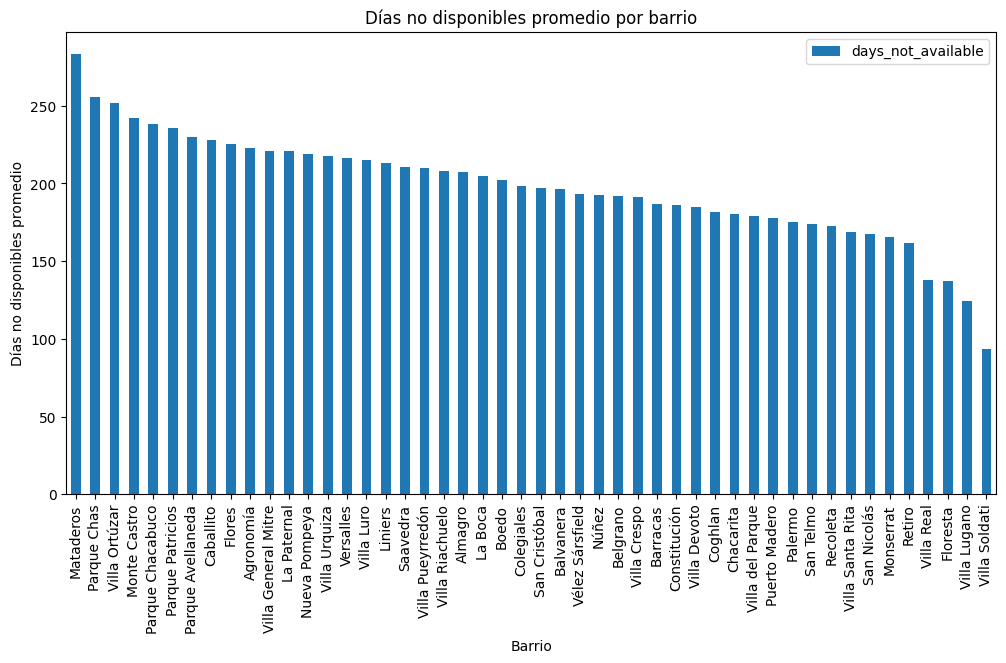

In [19]:
# Agrupar por barrio y calcular el promedio de días no disponibles y luego ordenarlos
neighbourhood_occupancy = merged_data.groupby('neighbourhood').agg({'days_not_available': 'mean'}).sort_values(by='days_not_available', ascending=False)

# Visualizar los resultados con un gráfico de barras
import matplotlib.pyplot as plt

neighbourhood_occupancy.plot(kind='bar', figsize=(12,6))
plt.title("Días no disponibles promedio por barrio")
plt.ylabel("Días no disponibles promedio")
plt.xlabel("Barrio")
plt.show()

Estudiamos la relación entre el precio y la ocupación.


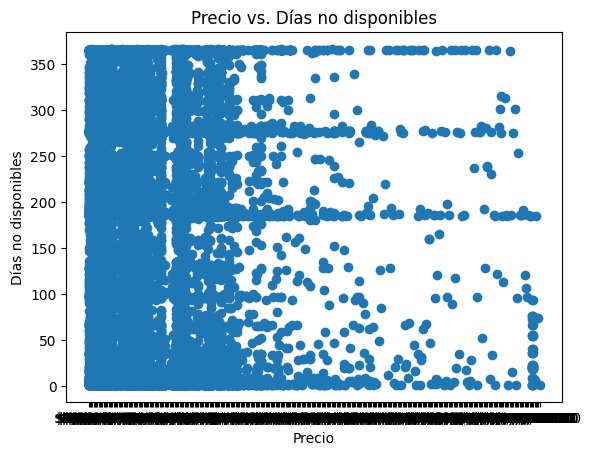

In [20]:
# Gráfico de dispersión para analizar la relación entre precio y días no disponibles
plt.scatter(merged_data['price'], merged_data['days_not_available'])
plt.title("Precio vs. Días no disponibles")
plt.ylabel("Días no disponibles")
plt.xlabel("Precio")
plt.show()

In [21]:
# Filtrar el dataset 'calendar' para los días no disponibles
days_not_available = calendar[calendar['available'] == 0].groupby('listing_id').size()

# Calcular la tasa de ocupación
total_days = calendar.groupby('listing_id').size()
occupancy_rate = days_not_available / total_days

# Convertir a DataFrame
occupancy_df = occupancy_rate.reset_index(name='occupancy_rate')


In [24]:
occupancy_df.head()

,listing_id,occupancy_rate
0,11508,0.0
1,12463,0.0
2,13095,0.0
3,13096,0.0
4,13097,0.0


In [23]:
# Calcular los días no disponibles para cada listing_id
days_not_available = calendar[calendar['available'] == 0].groupby('listing_id').size()

# Calcular el total de días para cada listing_id
total_days = calendar.groupby('listing_id').size()

# Calcular la tasa de ocupación, llenando los NaN con 0
occupancy_rate = (days_not_available / total_days).fillna(0)

# Convertir a DataFrame
occupancy_df = occupancy_rate.reset_index(name='occupancy_rate')


In [25]:
# Fusionar listings con occupancy_df
merged_data = pd.merge(listings, occupancy_df, left_on='id', right_on='listing_id', how='left')

# Llenamos los NaN en occupancy_rate con 0
merged_data['occupancy_rate'] = merged_data['occupancy_rate'].fillna(0)


In [26]:
# Agrupar por barrio y calcular la tasa de ocupación media
neighbourhood_occupancy = merged_data.groupby('neighbourhood')['occupancy_rate'].mean().reset_index()

# Ordenar los barrios por tasa de ocupación descendente
neighbourhood_occupancy = neighbourhood_occupancy.sort_values(by='occupancy_rate', ascending=False)


In [27]:
neighbourhood_occupancy.head(10)

,neighbourhood,occupancy_rate
24,Parque Chas,0.602411
14,La Paternal,0.582344
23,Parque Chacabuco,0.582290
18,Monte Castro,0.573599
39,Villa Ortúzar,0.571277
16,Mataderos,0.568950
22,Parque Avellaneda,0.545388
11,Flores,0.542584
6,Caballito,0.539271
0,Agronomía,0.533733


Basándonos en los datos de ocupación que proporcionaste, aquí hay algunas conclusiones preliminares:

Parque Chas es el barrio con la mayor tasa de ocupación promedio, lo que sugiere que las propiedades en este barrio tienden a ser alquiladas con más frecuencia que en otros barrios. Esto podría indicar una alta demanda en la zona.

Las áreas como La Paternal, Parque Chacabuco y Monte Castro también muestran altas tasas de ocupación, lo que indica que podrían ser áreas populares para los visitantes o que hay menos oferta y se llenan rápidamente.

Barrios como Agronomía, aunque en el top 10, tienen una tasa de ocupación ligeramente más baja en comparación con Parque Chas.

### Consideraciones adicionales:

Estas tasas de ocupación por sí solas no necesariamente indican dónde deberías invertir. También es importante considerar otros factores, como el costo promedio de las propiedades en cada barrio, la rentabilidad esperada, las comodidades del barrio, el acceso al transporte, etc.

Una tasa de ocupación más alta podría indicar una demanda alta, pero también podría indicar una oferta limitada en ese barrio. Si hay muchas propiedades disponibles pero pocas se alquilan, la tasa de ocupación será baja. Por otro lado, si hay pocas propiedades disponibles y todas o casi todas se alquilan, la tasa de ocupación será alta.

In [30]:
non_numeric_columns = listings.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_licens

In [31]:
# Selecciona las columnas no numéricas relevantes para categorizar
columns_to_categorize = ['neighbourhood', 'property_type', 'room_type', 'cancellation_policy']

# Convertir estas columnas a códigos numéricos
for column in columns_to_categorize:
    listings[column + '_cat'] = listings[column].astype('category').cat.codes

# Ahora, tendrías nuevas columnas en tu DataFrame, como 'neighbourhood_cat', que son representaciones numéricas de las originales.


In [37]:
# Asumiendo que tu dataframe con tasas de ocupación se llama neighbourhood_occupancy:
listings = listings.merge(neighbourhood_occupancy, on='neighbourhood', how='left')


In [38]:
avg_occupancy_by_type_neighbourhood = listings.groupby(['property_type', 'neighbourhood'])['occupancy_rate'].mean().reset_index()
top_occupancy_combinations = avg_occupancy_by_type_neighbourhood.sort_values(by='occupancy_rate', ascending=False).head(10)


C:\Users\nacho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nacho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nacho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

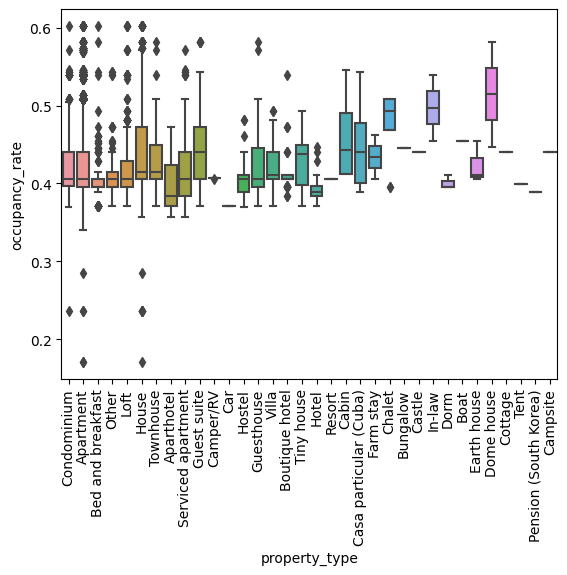

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='property_type', y='occupancy_rate', data=listings)
plt.xticks(rotation=90)
plt.show()
